# Competitive Inhibition

## Motivation

The inhibition of enzymes is a common target for therapeutics.  Additionally, it can be an endongenous control for the enzyme activity. In this notebook, we derive the rate law for a specific type of inhibition.

## Learning Goals

After working through these notes, you will be able to:

1. Write out the competitive inhibition mechanism and describe the steps
2. Derive the competitive inhibition rate law
3. Describe, qualitatively, how $[I]_0$ and $K_I$ can affect the rate of reaction
4. Calculate IC50 from $K_I$ ($[S]_0$ and $K_m$).

## Coding Concepts

The following coding concepts are used in this notebook

1. [Variables](../../coding_concepts/variables.ipynb)
2. [Functions](../../coding_concepts/functions.ipynb)
3. [Plotting with matplotlib](../../coding_concepts/plotting_with_matplotlib.ipynb)

## Competitive Inhibition Mechanism

Unlike all other reactions and mechanisms we have seen thus far, the competitive inhibition mechanism deals with two competing reactions.  The concept here is that the enzyme has a single binding site which can either be occuppied by the substrate, $S$, or the inhibitor, $I$.  If the inhibitor binds, it must unbind and substrate bind and react to form product.  The stronger the binding coefficient of the inhibitor, the better it is at preventing back reaction and ultimately preventing product formation.

The underlying reaction we are considering is 
\begin{equation}
S \underset{E}{\longrightarrow} P
\end{equation}
Here, the enzyme is denoted by the $E$ underneath the reaction arrow.  We are also considering that the uncatalyzed reaction is so slow that negligible product will form in measurable time without the enzyme present.

Since it is the inhibition of the enzyme that we are considering, we will list it as a reactant and product in the reaction.
\begin{equation}
S + E \longrightarrow E + P
\end{equation}
Now, we introduce an inhibitor molecule, $I$, that binds to the same active site of the enzyme and does not form a product.  This can be denoted as 
\begin{equation}
I + E \longrightarrow EI
\end{equation}
The enzyme-inhibitor complex, $EI$, is not an effective catalyst of the substrate to product formation reaction.

We can write the combined reaction in the following way
\begin{equation}
EI + S \longleftarrow E + I + S \longrightarrow E + I + P
\end{equation}
where the first arrow denotes that the solution of $E$, $I$ and $S$ reacts to form $EI$ with $S$ unaffected.  

If we now consider that the $S$ to $P$ reaction follows a Michaelis-Menten mechanism, we can write the mechanism as
\begin{equation}
EI + S \overset{k_i}{\underset{k_{-i}}{\overset{\Longleftarrow}{\Longrightarrow}}} E + I + S \overset{k_1}{\underset{k_{-1}}{\overset{\Longrightarrow}{\Longleftarrow}}} ES + I \overset{k_2}{\Longrightarrow} E + P + I
\end{equation}
where we note that each step is now an elementary step.  This can also be written as a multistep mechanism
\begin{align}
E + I & \overset{k_i}{\underset{k_{-i}}{\overset{\Longrightarrow}{\Longleftarrow}}} EI \\
E + S &\overset{k_1}{\underset{k_{-1}}{\overset{\Longrightarrow}{\Longleftarrow}}} ES \\
ES &\overset{k_2}{\Longrightarrow} E + P 
\end{align}

## Competitive Inhibition Rate Law

We will now derive the rate law stemming from the mechanism written above.  We still care about the rate of formation of the product so
\begin{equation}
v = \frac{d[P]}{dt} = k_2[ES]
\end{equation}
You may be inclined to say that $v = k_2[ES][I]$ for the rate law for the final step.  Careful inspection of this step, however, demonstrates that $I$ is a bystander - it shows up as both reactant and product and is not hypothesized to do anything to facilitate the reaction.  Thus, it should not appear in the rate law.  This is apparent when you look at the three-step version of the mechanism.

We can also write out the differential equation for the rate of change of $ES$ concentration:
\begin{equation}
\frac{d[ES]}{dt} = -(k_2 + k_{-1})[ES] + k_1[E][S]
\end{equation}
We recognize, again, that the total enzyme concentration floating around the reaction will remain constant or that
\begin{eqnarray}
[E]_0 &=& [E] + [ES] + [EI] \\
\Rightarrow [E] &=& [E]_0 - [ES] - [EI]
\end{eqnarray}
where the last term must be included here (as opposed to Michaelis-Menten and cooperative binding mechanisms) because this complex can be formed and occupy some of the enzyme concentration.  Indeed, if the inhibitor is "good" then most of the enzyme will be of this form.  

We can plug the above expression for $[E]$ into the differential expression for $[ES]$ but it will still have two interdependent terms in it (namely $[ES]$ and $[EI]$).  To attempt to alleviate this issue, we make our first approximation and that is a rapid equilibrium for the $EI$ formation reaction.  Thus, we say
\begin{equation}
[EI] \approx \frac{[E][I]}{K_I},
\end{equation}
where $K_I = \frac{k_{-i}}{k_{i}}$ is the dissociation constant of the enzyme-inhibitor complex.  Using this expression for $[EI]$ and solving for $[E]$ using the fixed total enzyme concentration expression above we get
\begin{equation}
[E] = \frac{[E]_0 - [ES]}{1 + [I]/K_I}
\end{equation}

Substituting this expression for $[E]$ into the differential expression for $[ES]$ we get
\begin{eqnarray}
\frac{d[ES]}{dt} &=& -(k_2 + k_{-1})[ES] + k_1\frac{([E]_0 - [ES])}{1 + [I]/K_I}[S]
&=& -(k_2 + k_{-1}+ \frac{k_1[S]}{1 + [I]/K_I})[ES] + \frac{k_1[E]_0}{1 + [I]/K_I}[S]
\end{eqnarray}

Now employing the steady-state approximation for $ES$ we get
\begin{eqnarray}
0 &=& -(k_2 + k_{-1}+ \frac{k_1[S]}{1 + [I]/K_I})[ES] + \frac{k_1[E]_0}{1 + [I]/K_I}[S] \\
\Rightarrow [ES]_{s.s.} &=& \frac{\frac{k_1[E]_0}{1 + [I]/K_I}[S]}{k_2 + k_{-1}+ \frac{k_1[S]}{1 + [I]/K_I}} \\
&=& \frac{[E]_0[S]}{\frac{k_2 + k_{-1}}{k_1}\left(1 + [I]/K_I\right)+ [S]}
\end{eqnarray}
where the last equality holds by multiplying numerator and denominator by $\frac{1 + [I]/K_I}{k_1[S]}$.  We can now define $K_m = \frac{k_2 + k_{-1}}{k_1}$ and substitute the above expression into the overall rate law to get
\begin{equation}
v = \frac{d[P]}{dt} = \frac{k_2[E]_0[S]}{K_m\left(1 + [I]/K_I\right)+ [S]}
\end{equation}

Finally, we recognize that the product formation step could actually be reversible so we only investigate initial time ultimately yielding
\begin{equation}
v_0 = \frac{k_2[E]_0[S]_0}{K_m\left(1 + [I]_0/K_I\right)+ [S]_0}
\end{equation}

## Qualitative Interpretation of Competitive Inhibition Rate Law

The competitive inhibition rate law introduces two new variables into the rate law for production formation.  Those are the initial inhibitor concentration, $[I]_0$, and the enzyme-inhibitor dissociation constant, $K_I$.  The ratio of these values has an affect on the initial rate.  Holding either constant and altering the other can have an affect on the initial rate.  

Holding the inhibitor dissociation constant, $K_I$, constant and increasing the inhibtor concentration will reduce the initial rate of reaction as compared to the unhibited Michaelis-Menten rate.  This can be observed mathematically because increasing $[I]_0$, and holding everything else constant, will increase the value of the denominator in the rate law and thus decrease the overall initial rate.  This makes sense physically because for inhibitors that actually bind to the active site (thus have a finite $K_I$), increasing the concentration of inhibitor will drive the equilibrium of the formation of $EI$ towards the product (and thus the inhibited form of the enzyme).

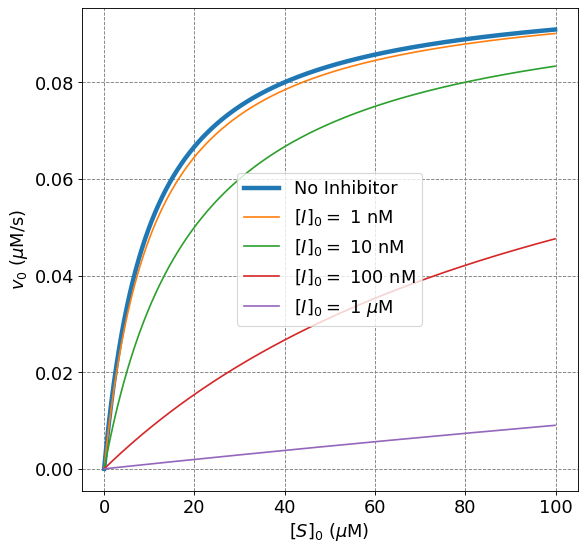

In [17]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# setup plot parameters
fontsize=16
fig = plt.figure(figsize=(8,8), dpi= 80, facecolor='w', edgecolor='k')
ax = plt.subplot(111)
ax.grid(b=True, which='major', axis='both', color='#808080', linestyle='--')
ax.set_ylabel("$v_0$ ($\mu$M/s)",size=fontsize)
ax.set_xlabel("$[S]_0$ ($\mu$M)",size=fontsize)
plt.tick_params(axis='both',labelsize=fontsize)
def mm(S0,vmax,Km):  
    return vmax*S0/(Km + S0)
def mmI(S0,vmax,Km,KI,I0):  
    return vmax*S0/(Km*(1+I0/KI) + S0)
vmax = 0.1
Km = 10
S0 = np.arange(0,100,0.1)
ax.plot(S0,mm(S0,vmax,Km),lw=4,label="No Inhibitor")
ax.plot(S0,mmI(S0,vmax,Km,1e-8,1e-9),label="$[I]_0 =$ 1 nM")
ax.plot(S0,mmI(S0,vmax,Km,1e-8,1e-8),label="$[I]_0 =$ 10 nM")
ax.plot(S0,mmI(S0,vmax,Km,1e-8,1e-7),label="$[I]_0 =$ 100 nM")
ax.plot(S0,mmI(S0,vmax,Km,1e-8,1e-6),label="$[I]_0 =$ 1 $\mu$M")
plt.legend(fontsize=16)

Holding the inhibitor concentration, $[I]_0$, constant and decreasing the inhibitor dissociation constant will reduce the initial rate of reaction as compared to the unhibited Michaelis-Menten rate.  This can be observed mathematically because decreasing $K_I$ will increase the ratio $[I]_0/K_I$, which will, in turn, increase the denominator of the $v_0$ expression and ultimately decrease the overall initial rate.  Physically, decreasing $K_I$ implies shifting the equilibrium more towards the formation of $EI$.  Doing so will cause more enzyme to be inhibited for a given concentration of inhibitor and thus slow the overall rate of product formation.

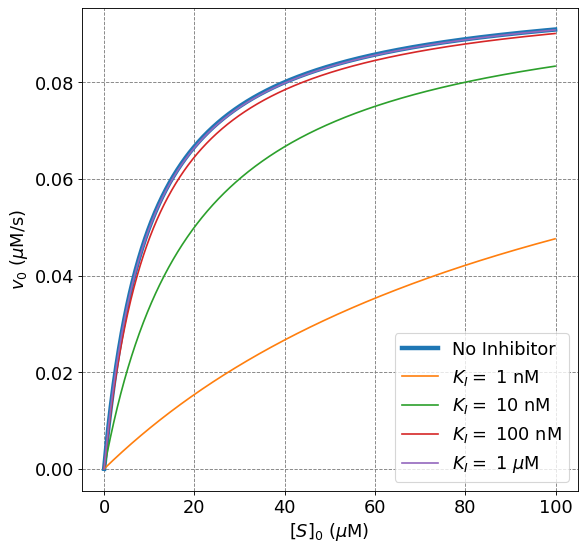

In [16]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# setup plot parameters
fontsize=16
fig = plt.figure(figsize=(8,8), dpi= 80, facecolor='w', edgecolor='k')
ax = plt.subplot(111)
ax.grid(b=True, which='major', axis='both', color='#808080', linestyle='--')
ax.set_ylabel("$v_0$ ($\mu$M/s)",size=fontsize)
ax.set_xlabel("$[S]_0$ ($\mu$M)",size=fontsize)
plt.tick_params(axis='both',labelsize=fontsize)
def mm(S0,vmax,Km):  
    return vmax*S0/(Km + S0)
def mmI(S0,vmax,Km,KI,I0):  
    return vmax*S0/(Km*(1+I0/KI) + S0)
vmax = 0.1
Km = 10
S0 = np.arange(0,100,0.1)
ax.plot(S0,mm(S0,vmax,Km),lw=4,label="No Inhibitor")
ax.plot(S0,mmI(S0,vmax,Km,1e-9,1e-8),label="$K_I =$ 1 nM")
ax.plot(S0,mmI(S0,vmax,Km,1e-8,1e-8),label="$K_I =$ 10 nM")
ax.plot(S0,mmI(S0,vmax,Km,1e-7,1e-8),label="$K_I =$ 100 nM")
ax.plot(S0,mmI(S0,vmax,Km,1e-6,1e-8),label="$K_I =$ 1 $\mu$M")
plt.legend(fontsize=16)

## Lineweaver-Burk Plots for Competitive Inhibition

Competitive Inhibition plots have the same $v_{max}$ as the standard Michaelis-Menten initial rate.  This becomes apparent when we consider the Lineweaver-Burk linearization of the Competitive Inhibition rate law.  First, we will make the substitution that
\begin{equation}
\alpha = 1 + \frac{[I]_0}{K_I}
\end{equation}
to introduce a parameter that accounts for changes in both $[I]_0$ and $K_I$.  Given this substition, it is readily shown that a Lineweaver-Burk version of the competitive inhibition rate law is
\begin{equation}
\frac{1}{v_0} = \alpha\frac{K_m}{v_{max}}\frac{1}{[S]_0} + \frac{1}{v_{max}}
\end{equation}

We notice that the only difference between this equation and the Lineweaver-Burk equation for the MM mechanism is the $\alpha$ altering the slope.  Thus, we expect the introduction of an inhibitor that follows a competitive inhibition mechanism to not alter $v_{max}$ and thus the intercept of the Lineweaver-Burk equation.

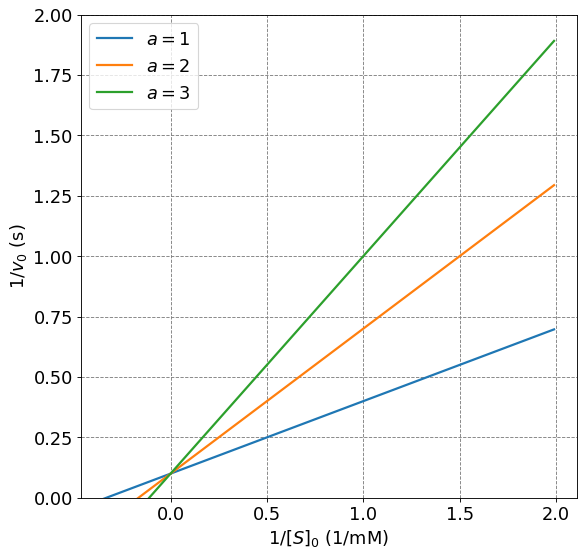

In [42]:
# plot data
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# setup plot parameters
fontsize=16
fig = plt.figure(figsize=(8,8), dpi= 80, facecolor='w', edgecolor='k')
ax = plt.subplot(111)
ax.grid(b=True, which='major', axis='both', color='#808080', linestyle='--')
ax.set_ylabel("$1/v_0$ (s)",size=fontsize)
ax.set_xlabel("$1/[S]_0$ (1/mM)",size=fontsize)
plt.tick_params(axis='both',labelsize=fontsize)
def lineweaver_burk(s_inv,vmax,Km,alpha):
    return alpha*Km/vmax*s_inv + 1/vmax
vmax = 10
Km = 3
alpha = 1
s_inv = np.arange(-0.35,2,0.01)
ax.plot(s_inv,lineweaver_burk(s_inv,vmax,Km,alpha),lw=2,label="$a = 1$")
ax.plot(s_inv,lineweaver_burk(s_inv,vmax,Km,2),lw=2,label="$a = 2$")
ax.plot(s_inv,lineweaver_burk(s_inv,vmax,Km,3),lw=2,label="$a = 3$")
plt.ylim(0,2)
plt.legend(fontsize=fontsize)

## Relationship between $K_I$ and IC50

The effectiveness of an inhibitor is often quantified by something called IC50.  IC50 stands for inhibitor concentration at 50\% activity.  Or, what inhibitor concentration is necessary to achieve 50\% activity?  To investigate this, we need to fix the enzyme and substrate concentration and alter the inhibitor concentration.

It can be shown that the relationship between IC50 and $K_I$ is
\begin{equation}
IC50 = K_I\left(1 + \frac{[S]_0}{K_m}\right)
\end{equation}

To demonstrate this relationship, we solve for $[I]$ when $v_0$ is half of the unhibited (MM) rate for fixed $[S]_0$:
\begin{align}
&\frac{k_2[E]_0[S]_0}{K_m\left(1 + IC50/K_I\right)+ [S]_0} = \frac{1}{2}\frac{k_2[E]_0[S]_0}{K_m+ [S]_0} \\
&\Rightarrow 2(K_m+ [S]_0) = K_m\left(1 + IC50/K_I\right)+ [S]_0 \\
&\Rightarrow 2K_m+ 2[S]_0 - K_m - [S]_0 = K_m\cdot IC50/K_I \\
&\Rightarrow K_m+ [S]_0 = K_m\cdot IC50/K_I  \\
&\Rightarrow 1+ \frac{[S]_0}{K_m} = IC50/K_I \\
&\Rightarrow K_I\left(1 + \frac{[S]_0}{K_m}\right) = IC50
\end{align}

IC50 =  1.000001e-08


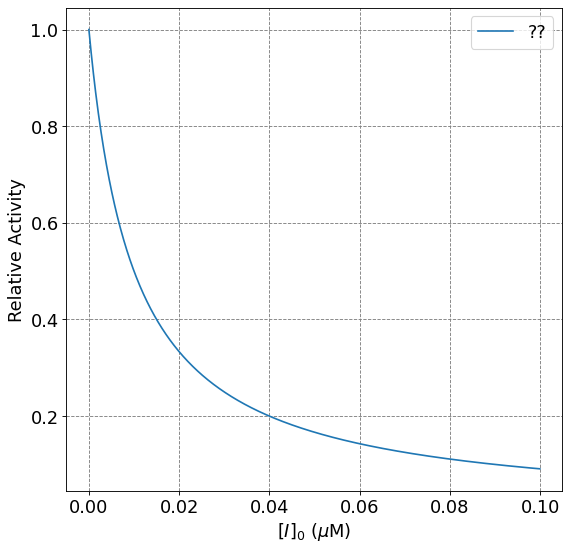

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# setup plot parameters
fontsize=16
fig = plt.figure(figsize=(8,8), dpi= 80, facecolor='w', edgecolor='k')
ax = plt.subplot(111)
ax.grid(b=True, which='major', axis='both', color='#808080', linestyle='--')
ax.set_ylabel("Relative Activity",size=fontsize)
ax.set_xlabel("$[I]_0$ ($\mu$M)",size=fontsize)
plt.tick_params(axis='both',labelsize=fontsize)
def relative_activity(I0,Km,KI,S0):  
    return (Km+S0)/ ( (1+I0/KI)*Km + S0)
Km = 10
S0 = 1e-5
I0 = np.arange(0,0.1,0.0001)
KI = 1e-8
ax.plot(I0,relative_activity(I0*1e-6,Km,KI,S0),label="??")
plt.legend(fontsize=16)
print("IC50 = ", KI*(1+S0/Km))